In [15]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [16]:
df=pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [17]:
df.shape


(15039, 11)

In [18]:
df.info


<bound method DataFrame.info of            AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583

In [19]:
df.describe()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [20]:
df.isnull().sum()


AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [21]:
x = df.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= df.loc[:,['TEY']]
standard = StandardScaler()
x = standard.fit_transform(x)
y = standard.fit_transform(y) 

In [22]:
x.shape


(15039, 10)

In [23]:
y.shape


(15039, 1)

In [41]:
from keras.models import Sequential
from keras.layers import Dense,InputLayer,Dropout
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [42]:
def create_model():
    model=Sequential()
    model.add(Dense(10,input_dim=10,kernel_initializer='random_uniform',activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
   
    
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
    return model

In [30]:
import warnings
warnings.filterwarnings('ignore')
estimator=KerasRegressor(build_fn=create_model,epochs=50,batch_size=100,verbose=0)
kfold=KFold(n_splits=10)
results=cross_val_score(estimator,x,y,cv=kfold)

In [29]:
results.mean()

-0.558988019824028

In [32]:
estimator.fit(x,y)
pred=estimator.predict(x)
pred

array([2.8245602e-05, 2.8763734e-05, 2.9237532e-05, ..., 1.3429461e-05,
       1.5100190e-05, 1.8252365e-05], dtype=float32)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
estimator.fit(x_train, y_train)
prediction = estimator.predict(x_test)
prediction

array([3.8704449e-05, 9.9989235e-01, 9.5938528e-01, ..., 4.1362884e-05,
       7.1993802e-04, 3.8918937e-05], dtype=float32)

In [34]:
X = df.drop(columns = ['TEY'], axis = 1) 
y = df.iloc[:,7]
from sklearn.preprocessing import scale
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)
x_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [35]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y
predictions_df['Pred'] = pred
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Pred'])/predictions_df['Actual']*100
predictions_df

,Actual,Pred,% Error
0,114.70,0.000028,99.999975
1,114.72,0.000029,99.999975
2,114.71,0.000029,99.999975
3,114.72,0.000029,99.999974
4,114.72,0.000029,99.999975
...,...,...,...
15034,111.61,0.000014,99.999987
15035,111.78,0.000015,99.999987
15036,110.19,0.000013,99.999988
15037,110.74,0.000015,99.999986


In [36]:
import tensorflow as tf
input_size = 10
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [37]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(x_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 3s - loss: 2842.0708 - mean_squared_error: 2842.0708 - val_loss: 191.2609 - val_mean_squared_error: 191.2609 - 3s/epoch - 7ms/step
Epoch 2/100
381/381 - 1s - loss: 99.5151 - mean_squared_error: 99.5151 - val_loss: 77.1771 - val_mean_squared_error: 77.1771 - 971ms/epoch - 3ms/step
Epoch 3/100
381/381 - 1s - loss: 45.5205 - mean_squared_error: 45.5205 - val_loss: 38.3809 - val_mean_squared_error: 38.3809 - 925ms/epoch - 2ms/step
Epoch 4/100
381/381 - 1s - loss: 23.8488 - mean_squared_error: 23.8488 - val_loss: 19.7693 - val_mean_squared_error: 19.7693 - 962ms/epoch - 3ms/step
Epoch 5/100
381/381 - 1s - loss: 12.5049 - mean_squared_error: 12.5049 - val_loss: 11.4057 - val_mean_squared_error: 11.4057 - 929ms/epoch - 2ms/step
Epoch 6/100
381/381 - 1s - loss: 7.0959 - mean_squared_error: 7.0959 - val_loss: 7.8510 - val_mean_squared_error: 7.8510 - 921ms/epoch - 2ms/step
Epoch 7/100
381/381 - 1s - loss: 4.4986 - mean_squared_error: 4.4986 - val_loss: 5.4331 - val_mean_sq

In [38]:
test_loss, mean_squared_error = model.evaluate(x_test_scaled, y_test)


47/47 [==============================] - 0s 3ms/step - loss: 1.3287 - mean_squared_error: 1.3287


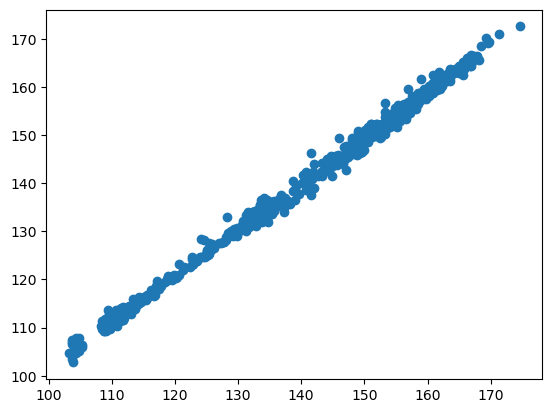

In [39]:
predictions = model.predict_on_batch(x_test_scaled)
plt.scatter(y_test, predictions)

In [40]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,135.089493,0.468164
1,111.88,113.100555,1.090951
2,133.72,134.329971,0.456156
3,133.79,133.611633,0.133318
4,110.77,112.605225,1.656788
...,...,...,...
1499,132.85,133.255478,0.305215
1500,125.07,125.842499,0.617653
1501,160.95,159.797226,0.716231
1502,133.12,133.292572,0.129636
